<a href="https://colab.research.google.com/github/olivia-sp/h2-station-dev/blob/main/station_model_total_EDA_v0_3_olivia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA

In [99]:
import pandas as pd
import os

from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [100]:
import os

if os.path.isfile('/content/content/drive/MyDrive/Colab Notebooks/data_set/result-congress-26-tune1.csv') == True:
  print('already')
else:
  #os.mkdir('data_set')
  %cd data_set
  !wget https://raw.githubusercontent.com/olivia-sp/h2-station-dev/main/data_set/result-congress-26-tune1.csv

% cd /content


[Errno 2] No such file or directory: 'data_set'
/content
--2022-01-19 09:43:55--  https://raw.githubusercontent.com/olivia-sp/h2-station-dev/main/data_set/result-congress-26-tune1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-01-19 09:43:55 ERROR 404: Not Found.

/content


In [101]:
CURR_PATH = os.getcwd()

os.listdir(CURR_PATH)
#DATA_PATH = os.path.join(CURR_PATH,'data_set')
RAW_PATH = CURR_PATH + '/drive/MyDrive/Colab Notebooks/data_set/result-congress-26-tune1.csv'



In [102]:
df_raw_data = pd.read_csv(RAW_PATH, index_col=0)
df_raw_data.info()

df_raw_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77222 entries, 0 to 77436
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   holiday             77222 non-null  bool   
 1   weekend             77222 non-null  bool   
 2   time                77222 non-null  object 
 3   precipitation_type  46123 non-null  float64
 4   temperature         46123 non-null  float64
 5   station_name        77222 non-null  int64  
 6   filename            77222 non-null  object 
 7   precipitation       46123 non-null  float64
 8   total_car_num       77222 non-null  int64  
 9   day_week            77222 non-null  object 
 10  decision_car_num    76980 non-null  object 
 11  humid               46123 non-null  float64
 12  max_car_num         76907 non-null  float64
 13  year                77222 non-null  int64  
 14  month               77222 non-null  int64  
 15  day                 77222 non-null  int64  
 16  hour

holiday                   0
weekend                   0
time                      0
precipitation_type    31099
temperature           31099
station_name              0
filename                  0
precipitation         31099
total_car_num             0
day_week                  0
decision_car_num        242
humid                 31099
max_car_num             315
year                      0
month                     0
day                       0
hour                      0
minute                    0
second                    0
dtype: int64

In [105]:
df_raw_data = df_raw_data.reset_index()

In [106]:
df_raw_data2=df_raw_data.drop(['decision_car_num', 'max_car_num', 'filename'], axis=1)
df_raw_data2.isnull().sum()

index                     0
holiday                   0
weekend                   0
time                      0
precipitation_type    31099
temperature           31099
station_name              0
precipitation         31099
total_car_num             0
day_week                  0
humid                 31099
year                      0
month                     0
day                       0
hour                      0
minute                    0
second                    0
dtype: int64

In [107]:
df_raw_data2

,index,holiday,weekend,time,precipitation_type,temperature,station_name,precipitation,total_car_num,day_week,humid,year,month,day,hour,minute,second
0,0,False,False,2020-09-17-21h-20m-28s,0.0,23.0,26,0.0,2,thu,52.0,2020,9,17,21,20,28
1,1,False,False,2020-09-17-21h-38m-08s,0.0,23.0,26,0.0,3,thu,52.0,2020,9,17,21,38,8
2,2,False,False,2020-09-18-16h-45m-41s,0.0,25.3,26,0.0,4,fri,38.0,2020,9,18,16,45,41
3,3,False,False,2020-09-18-16h-50m-00s,0.0,25.3,26,0.0,4,fri,38.0,2020,9,18,16,50,0
4,4,False,False,2020-09-18-16h-55m-00s,0.0,25.3,26,0.0,4,fri,38.0,2020,9,18,16,55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77217,77432,False,False,2022-01-06-16h-40m-00s,NaN,NaN,26,NaN,3,thu,NaN,2022,1,6,16,40,0
77218,77433,False,False,2022-01-06-16h-45m-00s,NaN,NaN,26,NaN,3,thu,NaN,2022,1,6,16,45,0
77219,77434,False,False,2022-01-06-16h-50m-00s,NaN,NaN,26,NaN,4,thu,NaN,2022,1,6,16,50,0
77220,77435,False,False,2022-01-06-16h-55m-00s,NaN,NaN,26,NaN,2,thu,NaN,2022,1,6,16,55,0


In [108]:
df_raw_data2.drop(df_raw_data.loc[df_raw_data['total_car_num'] == 6].index, inplace =True)
df_raw_data2.info()

df_raw_data2.drop('time', axis=1, inplace = True)
df_raw_data2.info()


df_raw_data2['day_week'].replace('mon', 0, inplace = True)
df_raw_data2['day_week'].replace('tue', 1, inplace = True)
df_raw_data2['day_week'].replace('wen', 2, inplace = True)
df_raw_data2['day_week'].replace('thu', 3, inplace = True)
df_raw_data2['day_week'].replace('fri', 4, inplace = True)
df_raw_data2['day_week'].replace('sat', 5, inplace = True)
df_raw_data2['day_week'].replace('sun', 6, inplace = True)

df_raw_data2['holiday'] = df_raw_data['holiday'].astype(int)
df_raw_data2['weekend'] = df_raw_data['weekend'].astype(int)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77222 entries, 0 to 77221
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               77222 non-null  int64  
 1   holiday             77222 non-null  bool   
 2   weekend             77222 non-null  bool   
 3   time                77222 non-null  object 
 4   precipitation_type  46123 non-null  float64
 5   temperature         46123 non-null  float64
 6   station_name        77222 non-null  int64  
 7   precipitation       46123 non-null  float64
 8   total_car_num       77222 non-null  int64  
 9   day_week            77222 non-null  object 
 10  humid               46123 non-null  float64
 11  year                77222 non-null  int64  
 12  month               77222 non-null  int64  
 13  day                 77222 non-null  int64  
 14  hour                77222 non-null  int64  
 15  minute              77222 non-null  int64  
 16  seco

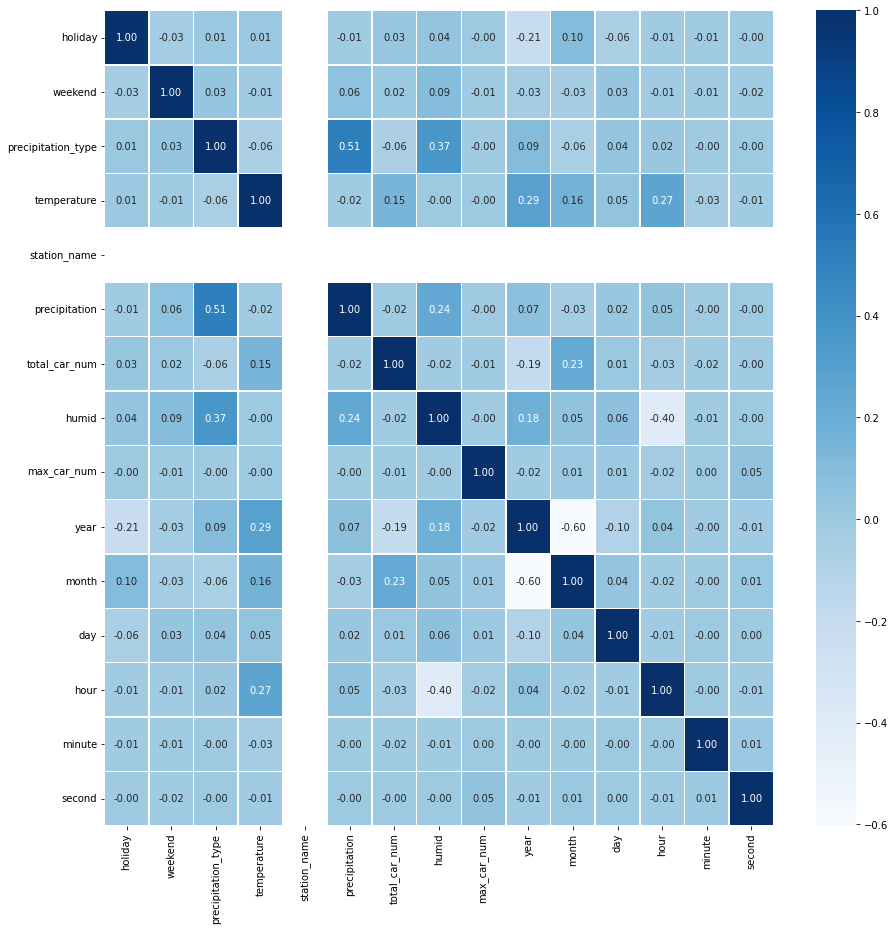

In [85]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df_raw_data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

결측값 처리

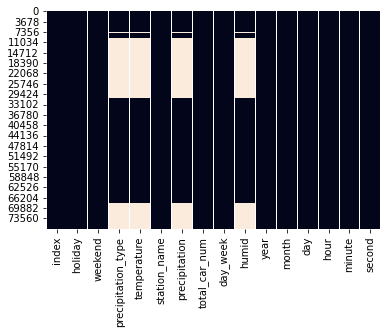

In [109]:
%matplotlib inline
sns.heatmap(df_raw_data2.isnull(), cbar=False)

Data Imputation
1. mean/median : 작은 크기의 숫자형 데이터셋, 다른 feature 간 상관관계 고려 안 함, 범주형 feature 사용 불가, 부정확함
2. most frequent/zero/constant : 범주형 데이터셋, 다른 feature 간 상관관계 고려 안 함, 데이터 bias 생성 가능
3. KNN imputation : feature similarity  이용하여 근접한 데이터 찾음(impyute lib), 데이터셋에 따라 다르나 가장 정확함, 메모리 많이 필요, outlier에 민감
4. MICE : 누락된 데이터 여러번 채우는 방식, 연속형/이진형/범위형 패턴 처리 가능, imputation-analysis(m개의 완성된 데이터 분석)-pooling(평균,분산,신뢰구간 계산하여 합침)
5. 딥러닝 이용 : 범주형/non-numerical 데이터에 매우 효과적, DNN 이용해서 누락 값 유추, 한번에 한 컬럼만 대체 가능, 대규모 데이터셋은 속도가 상당히 느림, 유추할 feature에 대한 정보있는 feature 직접 지정해야 함
6. stochastic regression imputation : 동일 데이터셋의 다른 feature에서 결측값 예측
7. Extrapolation and Interpolation : 이산형 범위 내 데이터로부터 값 추정, interpolation(20살, 40살 데이터로 30살 추측), Extrapolation(1~20 데이터로 10년 후 예측, 안정성 떨어짐)
8. Hot-Deck Imputation : 비슷한 데이터셋에서 랜덤하게 선택


In [110]:
df_null = df_raw_data2[['precipitation','precipitation_type', 'temperature', 'humid']]
df_raw_data3 = df_raw_data2.drop(['precipitation','precipitation_type', 'temperature', 'humid'], axis=1)
df_raw_data3

,index,holiday,weekend,station_name,total_car_num,day_week,year,month,day,hour,minute,second
0,0,0,0,26,2,3,2020,9,17,21,20,28
1,1,0,0,26,3,3,2020,9,17,21,38,8
2,2,0,0,26,4,4,2020,9,18,16,45,41
3,3,0,0,26,4,4,2020,9,18,16,50,0
4,4,0,0,26,4,4,2020,9,18,16,55,0
...,...,...,...,...,...,...,...,...,...,...,...,...
77217,77432,0,0,26,3,3,2022,1,6,16,40,0
77218,77433,0,0,26,3,3,2022,1,6,16,45,0
77219,77434,0,0,26,4,3,2022,1,6,16,50,0
77220,77435,0,0,26,2,3,2022,1,6,16,55,0


fillna(ffill/bfill)

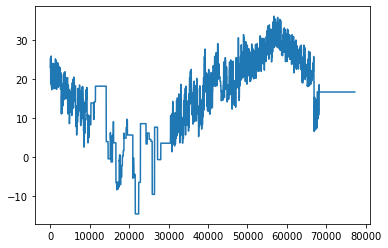

In [111]:
df_ffill = df_null.fillna(method='ffill')
df_ffill['temperature'].plot()

In [112]:
df_bfill = df_null.fillna(method='bfill')
df_bfill.isnull().sum() # null 존재, 보간 불가


precipitation         9013
precipitation_type    9013
temperature           9013
humid                 9013
dtype: int64

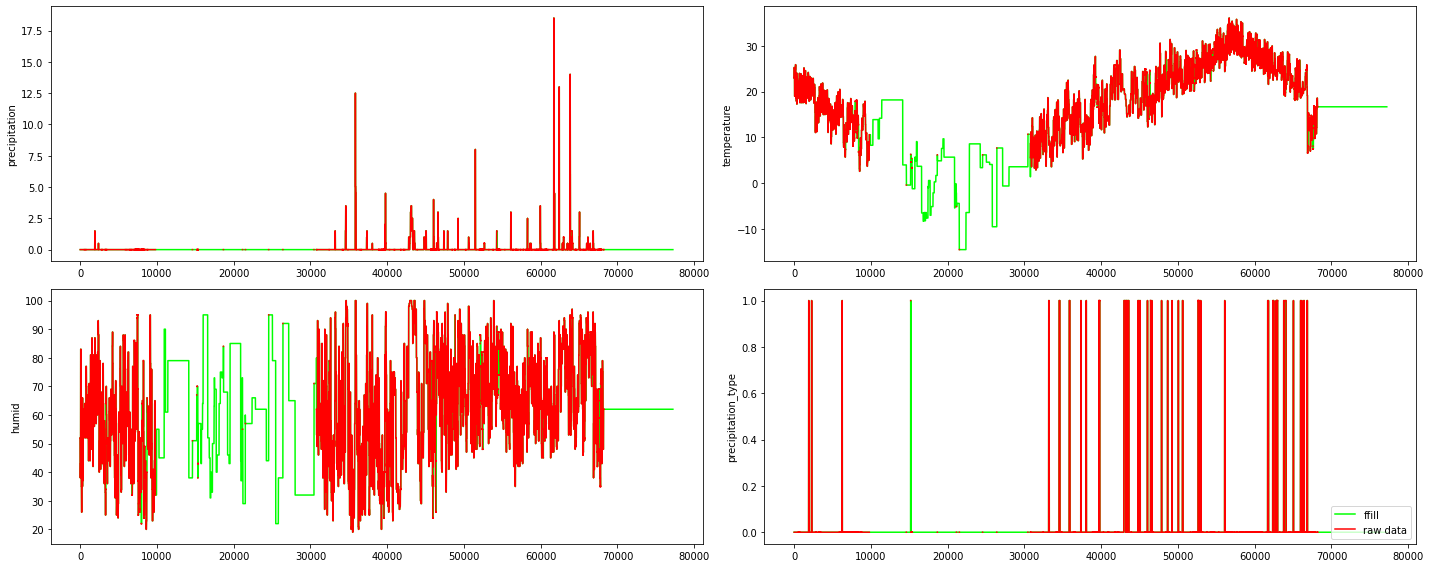

In [113]:
# subplot 적용
plt.figure(figsize = (20, 8))

chart1 = plt.subplot(2,2,1)
plt.plot(df_ffill['precipitation'], color='lime' , label='ffill')
plt.plot(df_raw_data2['precipitation'], color='red' , label='raw data')
plt.ylabel('precipitation')

chart2 = plt.subplot(2,2,2)
plt.plot(df_ffill['temperature'], color='lime' , label='ffill')
plt.plot(df_raw_data2['temperature'], color='red' , label='raw data')
plt.ylabel('temperature')

chart3 = plt.subplot(2,2,3)
plt.plot(df_ffill['humid'], color='lime' , label='ffill')
plt.plot(df_raw_data2['humid'], color='red' , label='raw data')
plt.ylabel('humid')

chart3 = plt.subplot(2,2,4)
plt.plot(df_ffill['precipitation_type'], color='lime' , label='ffill')
plt.plot(df_raw_data2['precipitation_type'], color='red' , label='raw data')
plt.ylabel('precipitation_type')

#chart.plot(roll_mean20, color='pink' , label='')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

Interpolate

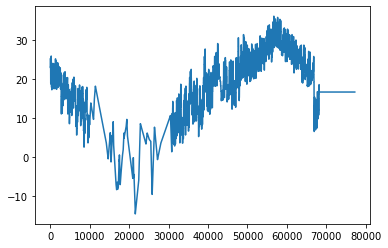

In [114]:
df_interpolate = df_null.interpolate()
df_interpolate['temperature'].plot()

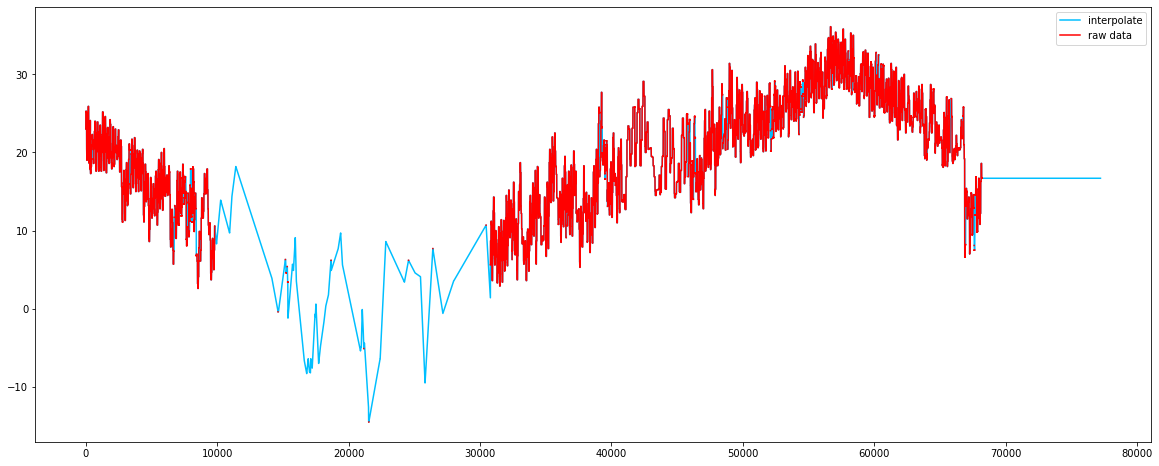

In [115]:
# subplot 적용
fig = plt.figure(figsize = (20, 8))
chart = fig.add_subplot(1,1,1)


chart.plot(df_interpolate['temperature'], color='deepskyblue' , label='interpolate')
chart.plot(df_raw_data2['temperature'], color='red' , label='raw data')

#chart.plot(roll_mean20, color='pink' , label='')
plt.legend(loc = 'best')

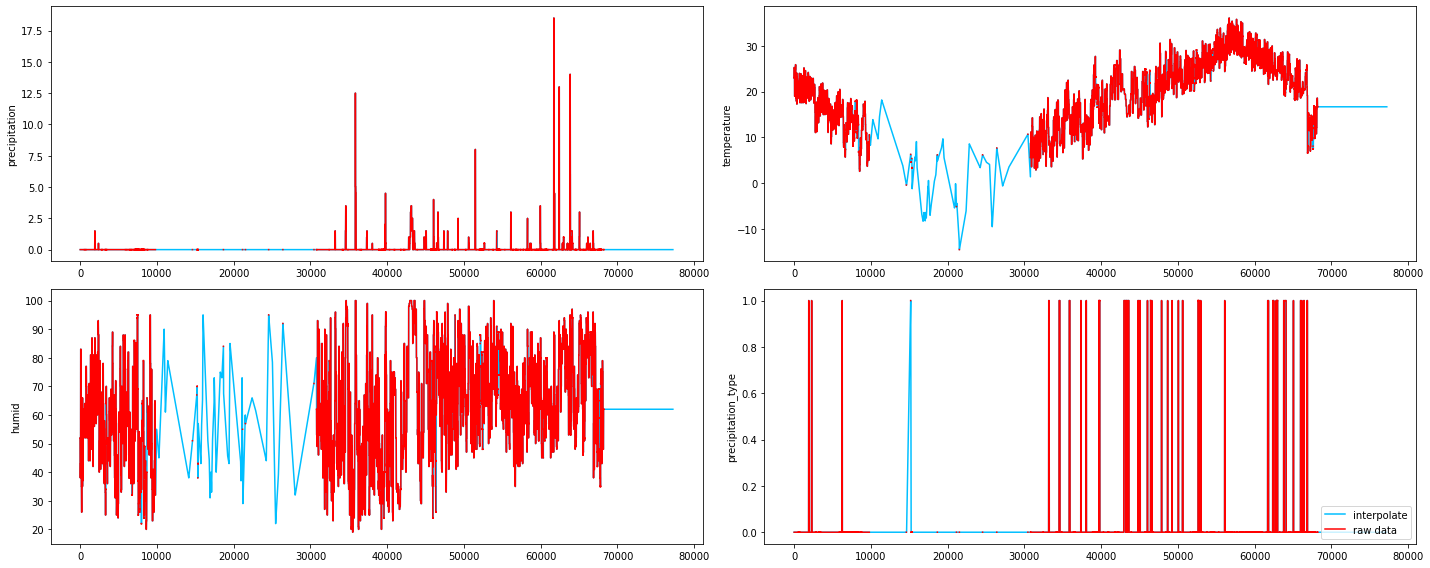

In [116]:
# subplot 적용
plt.figure(figsize = (20, 8))

chart1 = plt.subplot(2,2,1)
plt.plot(df_interpolate['precipitation'], color='deepskyblue' , label='interpolate')
plt.plot(df_raw_data2['precipitation'], color='red' , label='raw data')
plt.ylabel('precipitation')

chart2 = plt.subplot(2,2,2)
plt.plot(df_interpolate['temperature'], color='deepskyblue' , label='interpolate')
plt.plot(df_raw_data2['temperature'], color='red' , label='raw data')
plt.ylabel('temperature')

chart3 = plt.subplot(2,2,3)
plt.plot(df_interpolate['humid'], color='deepskyblue' , label='interpolate')
plt.plot(df_raw_data2['humid'], color='red' , label='raw data')
plt.ylabel('humid')

chart3 = plt.subplot(2,2,4)
plt.plot(df_interpolate['precipitation_type'], color='deepskyblue' , label='interpolate')
plt.plot(df_raw_data2['precipitation_type'], color='red' , label='raw data')
plt.ylabel('precipitation_type')

#chart.plot(roll_mean20, color='pink' , label='')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

Mean/Median

In [117]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='mean')
imp_mean.fit(df_null)
df_mean = pd.DataFrame(imp_mean.transform(df_null), columns = df_null.columns)

In [118]:
df_mean.isnull()

,precipitation,precipitation_type,temperature,humid
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
77217,False,False,False,False
77218,False,False,False,False
77219,False,False,False,False
77220,False,False,False,False


In [119]:
df_raw_data3

,index,holiday,weekend,station_name,total_car_num,day_week,year,month,day,hour,minute,second
0,0,0,0,26,2,3,2020,9,17,21,20,28
1,1,0,0,26,3,3,2020,9,17,21,38,8
2,2,0,0,26,4,4,2020,9,18,16,45,41
3,3,0,0,26,4,4,2020,9,18,16,50,0
4,4,0,0,26,4,4,2020,9,18,16,55,0
...,...,...,...,...,...,...,...,...,...,...,...,...
77217,77432,0,0,26,3,3,2022,1,6,16,40,0
77218,77433,0,0,26,3,3,2022,1,6,16,45,0
77219,77434,0,0,26,4,3,2022,1,6,16,50,0
77220,77435,0,0,26,2,3,2022,1,6,16,55,0


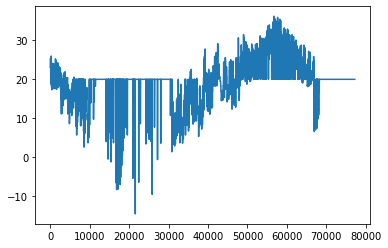

In [120]:
df_mean['temperature'].plot()

In [121]:
imp_median = SimpleImputer(strategy='median') #'median'을 쓰면 중앙값사용
imp_median.fit(df_null)
df_median = pd.DataFrame(imp_median.transform(df_null), columns = df_null.columns)

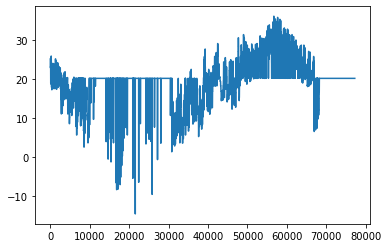

In [122]:
df_median['temperature'].plot()

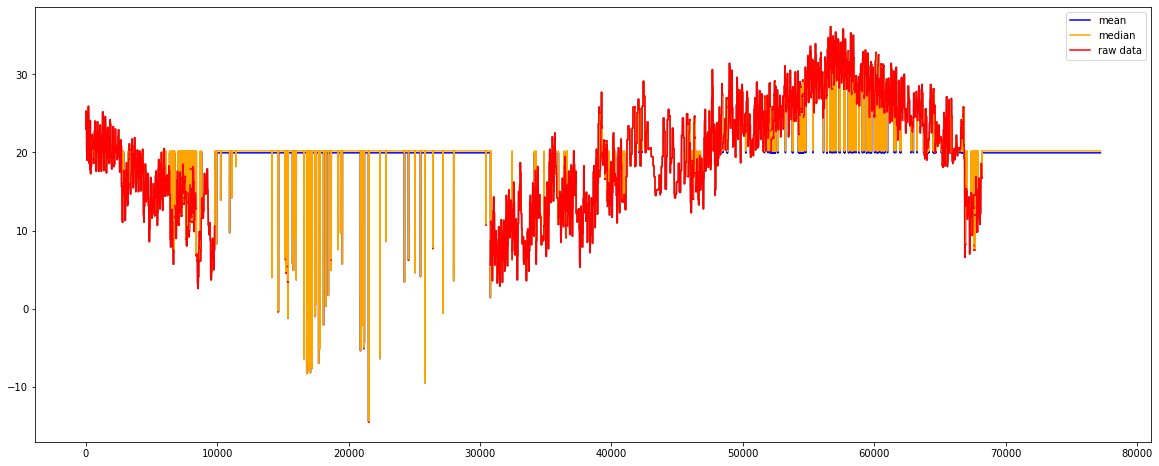

In [123]:
# subplot 적용
fig = plt.figure(figsize = (20, 8))
chart = fig.add_subplot(1,1,1)

chart.plot(df_mean['temperature'], color='blue' , label='mean')
chart.plot(df_median['temperature'], color='orange' , label='median')
chart.plot(df_raw_data2['temperature'], color='red' , label='raw data')
#chart.plot(roll_mean20, color='pink' , label='')
plt.legend(loc = 'best')

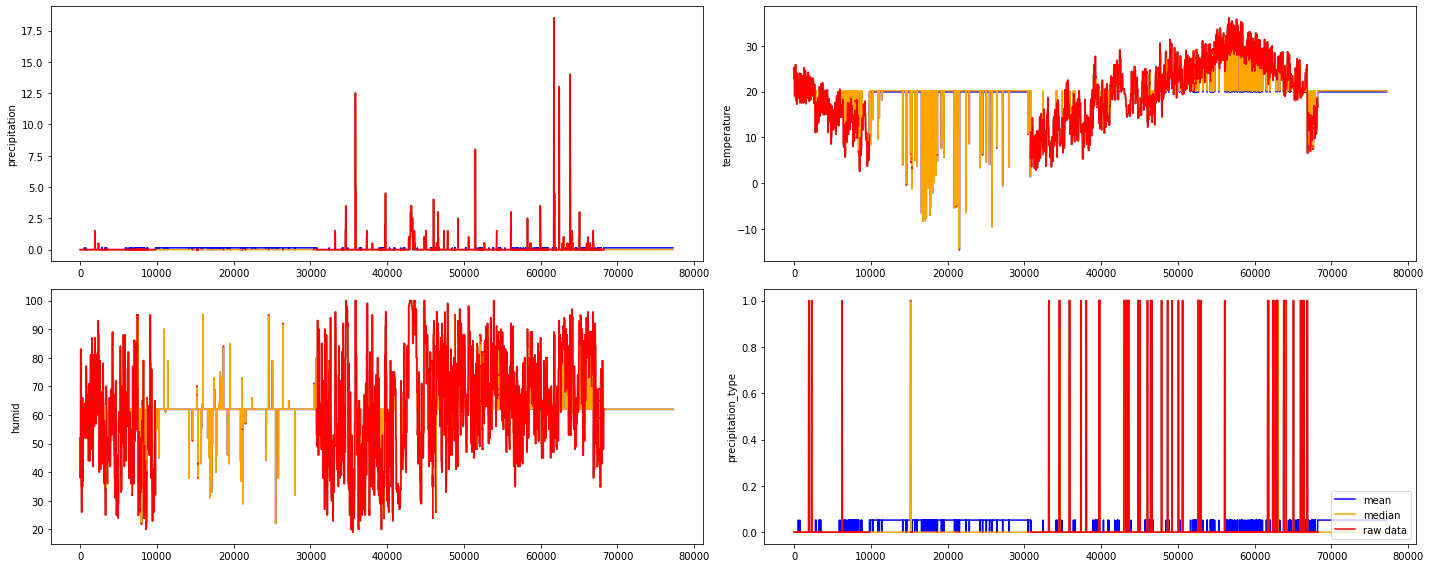

In [124]:
# subplot 적용
plt.figure(figsize = (20, 8))

chart1 = plt.subplot(2,2,1)
plt.plot(df_mean['precipitation'], color='blue' , label='mean')
plt.plot(df_median['precipitation'], color='orange' , label='median')
plt.plot(df_raw_data2['precipitation'], color='red' , label='raw data')
plt.ylabel('precipitation')

chart2 = plt.subplot(2,2,2)
plt.plot(df_mean['temperature'], color='blue' , label='mean')
plt.plot(df_median['temperature'], color='orange' , label='median')
plt.plot(df_raw_data2['temperature'], color='red' , label='raw data')
plt.ylabel('temperature')

chart3 = plt.subplot(2,2,3)
plt.plot(df_mean['humid'], color='blue' , label='mean')
plt.plot(df_median['humid'], color='orange' , label='median')
plt.plot(df_raw_data2['humid'], color='red' , label='raw data')
plt.ylabel('humid')

chart3 = plt.subplot(2,2,4)
plt.plot(df_mean['precipitation_type'], color='blue' , label='mean')
plt.plot(df_median['precipitation_type'], color='orange' , label='median')
plt.plot(df_raw_data2['precipitation_type'], color='red' , label='raw data')
plt.ylabel('precipitation_type')

#chart.plot(roll_mean20, color='pink' , label='')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

K-NN Imputation

In [125]:
!!pip3 install missingpy

['Requirement already satisfied: missingpy in /usr/local/lib/python3.7/dist-packages (0.2.0)']

In [126]:
import sklearn.neighbors._base
import sys
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base

In [127]:
from missingpy import KNNImputer
imp_knn = KNNImputer()
df_knn = pd.DataFrame(imp_knn.fit_transform(df_null), columns=df_null.columns)

/usr/local/lib/python3.7/dist-packages/missingpy/knnimpute.py:224: UserWarning: There are rows with more than 50.0% missing values. These rows are not included as donor neighbors.
  .format(self.row_max_missing * 100))
/usr/local/lib/python3.7/dist-packages/missingpy/knnimpute.py:282: UserWarning: There are rows with more than 50.0% missing values. The missing features in these rows are imputed with column means.
  .format(self.row_max_missing * 100))


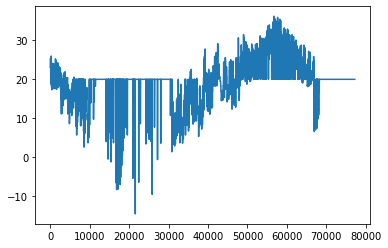

In [128]:
df_knn['temperature'].plot()

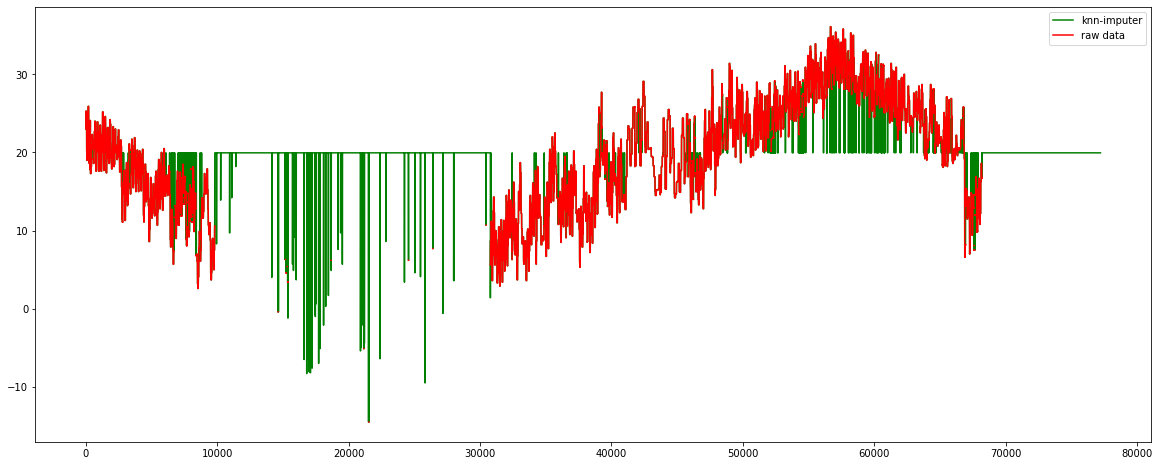

In [129]:
# subplot 적용
fig = plt.figure(figsize = (20, 8))
chart = fig.add_subplot(1,1,1)

chart.plot(df_knn['temperature'], color='green' , label='knn-imputer')
chart.plot(df_raw_data2['temperature'], color='red' , label='raw data')
plt.legend(loc = 'best')

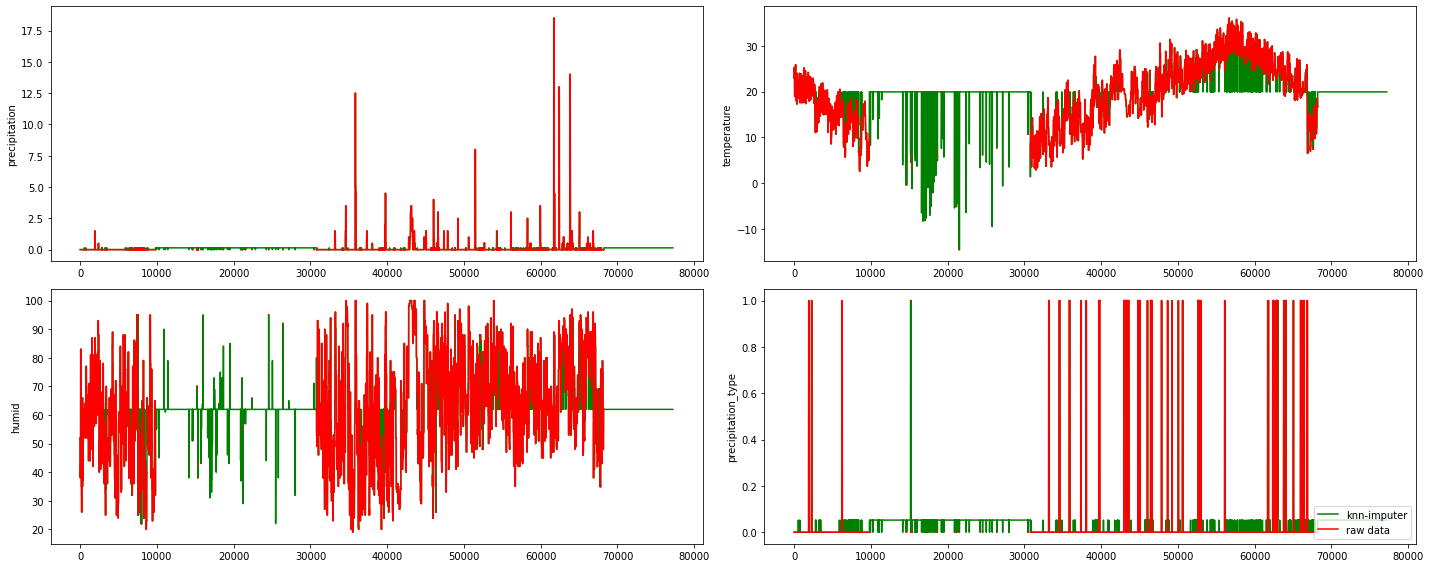

In [130]:
# subplot 적용
plt.figure(figsize = (20, 8))

chart1 = plt.subplot(2,2,1)
plt.plot(df_knn['precipitation'], color='green' , label='knn-imputer')
plt.plot(df_raw_data2['precipitation'], color='red' , label='raw data')
plt.ylabel('precipitation')

chart2 = plt.subplot(2,2,2)
plt.plot(df_knn['temperature'], color='green' , label='knn-imputer')
plt.plot(df_raw_data2['temperature'], color='red' , label='raw data')
plt.ylabel('temperature')

chart3 = plt.subplot(2,2,3)
plt.plot(df_knn['humid'], color='green' , label='knn-imputer')
plt.plot(df_raw_data2['humid'], color='red' , label='raw data')
plt.ylabel('humid')

chart3 = plt.subplot(2,2,4)
plt.plot(df_knn['precipitation_type'], color='green' , label='knn-imputer')
plt.plot(df_raw_data2['precipitation_type'], color='red' , label='raw data')
plt.ylabel('precipitation_type')

#chart.plot(roll_mean20, color='pink' , label='')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

MissForest Imputation

In [131]:
from missingpy import MissForest
imp_missForest = MissForest()
df_missForest = pd.DataFrame(imp_missForest.fit_transform(df_null), columns=df_null.columns)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 0


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Iteration: 1


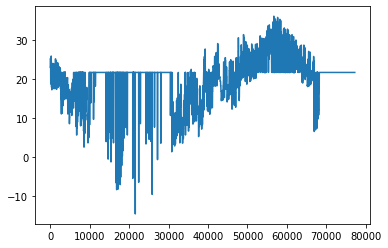

In [132]:
df_missForest['temperature'].plot()

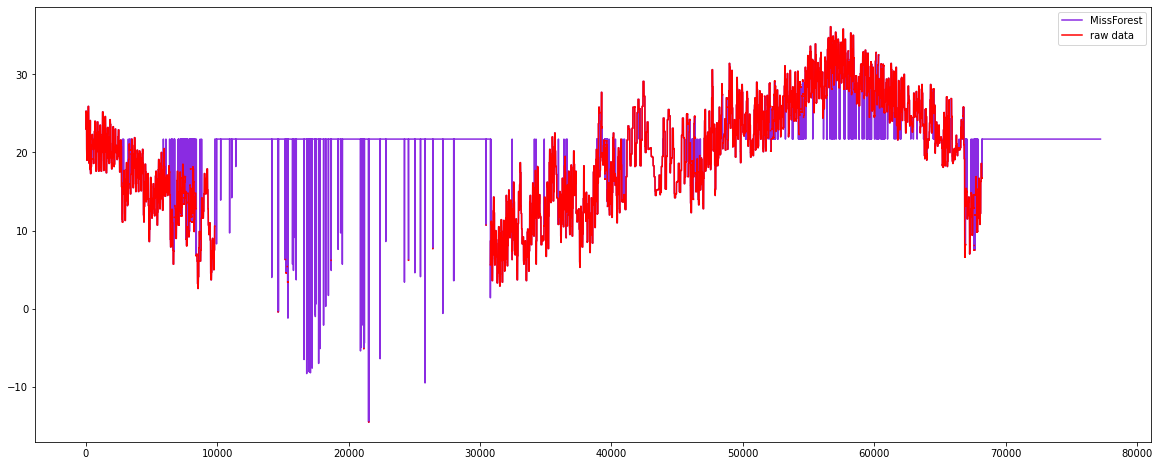

In [133]:
# subplot 적용
fig = plt.figure(figsize = (20, 8))
chart = fig.add_subplot(1,1,1)

chart.plot(df_missForest['temperature'], color='blueviolet' , label='MissForest')
chart.plot(df_raw_data2['temperature'], color='red' , label='raw data')
plt.legend(loc = 'best')

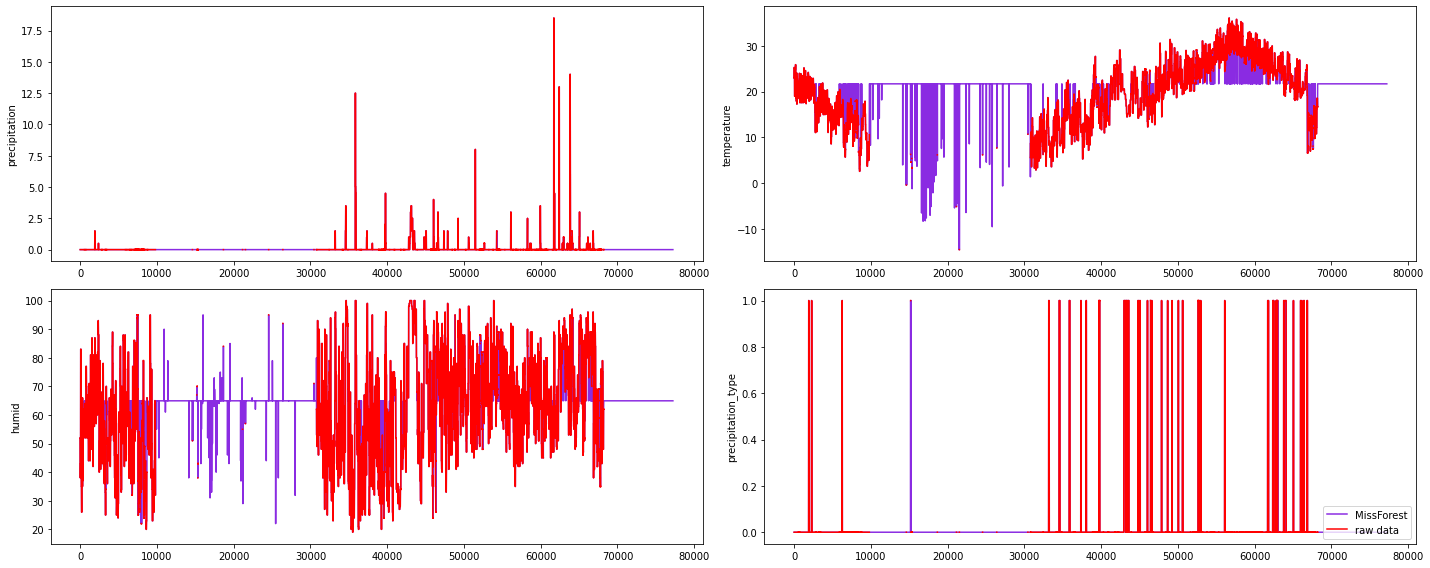

In [134]:
# subplot 적용
plt.figure(figsize = (20, 8))

chart1 = plt.subplot(2,2,1)
plt.plot(df_missForest['precipitation'], color='blueviolet' , label='MissForest')
plt.plot(df_raw_data2['precipitation'], color='red' , label='raw data')
plt.ylabel('precipitation')

chart2 = plt.subplot(2,2,2)
plt.plot(df_missForest['temperature'], color='blueviolet' , label='MissForest')
plt.plot(df_raw_data2['temperature'], color='red' , label='raw data')
plt.ylabel('temperature')

chart3 = plt.subplot(2,2,3)
plt.plot(df_missForest['humid'], color='blueviolet' , label='MissForest')
plt.plot(df_raw_data2['humid'], color='red' , label='raw data')
plt.ylabel('humid')

chart3 = plt.subplot(2,2,4)
plt.plot(df_missForest['precipitation_type'], color='blueviolet' , label='MissForest')
plt.plot(df_raw_data2['precipitation_type'], color='red' , label='raw data')
plt.ylabel('precipitation_type')

#chart.plot(roll_mean20, color='pink' , label='')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

MICE

In [135]:
!pip3 install impyute

In [136]:
from impyute.imputation.cs import mice
imp_mice = mice(df_null.values) # mice 학습시작
df_mice = pd.DataFrame(imp_mice, columns=df_null.columns)

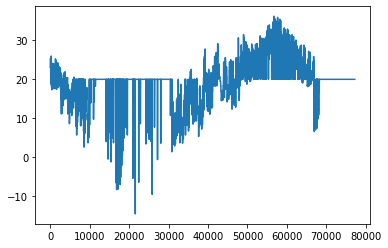

In [137]:
df_mice['temperature'].plot()

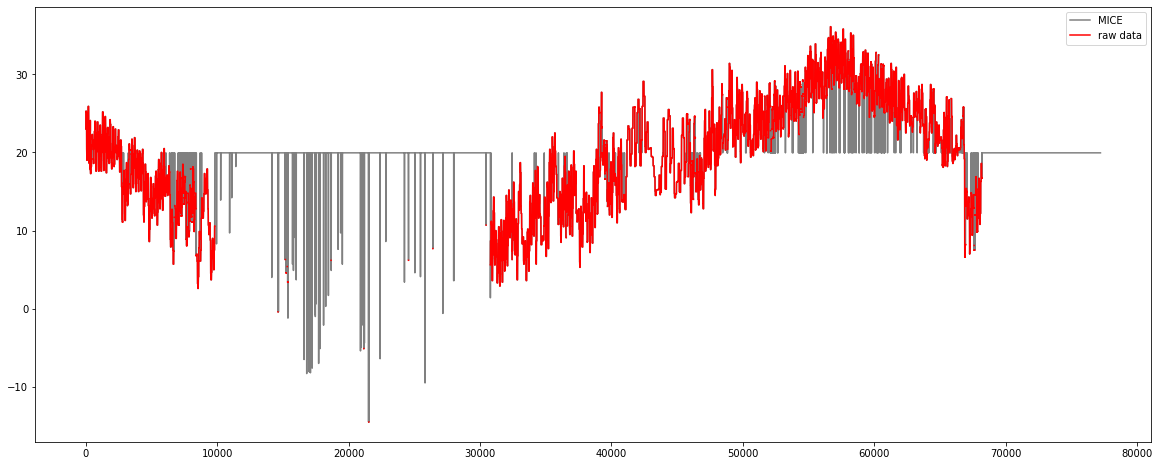

In [138]:
# subplot 적용
fig = plt.figure(figsize = (20, 8))
chart = fig.add_subplot(1,1,1)

chart.plot(df_mice['temperature'], color='gray' , label='MICE')
chart.plot(df_raw_data2['temperature'], color='red' , label='raw data')
plt.legend(loc = 'best')

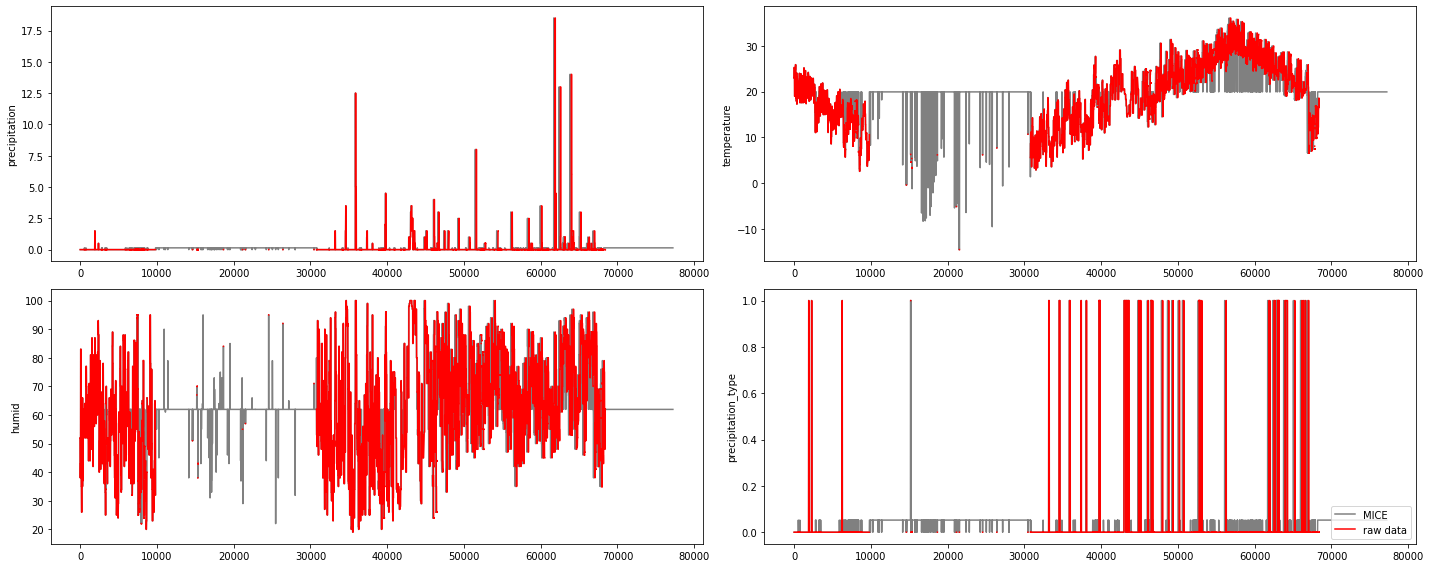

In [45]:
# subplot 적용
plt.figure(figsize = (20, 8))

chart1 = plt.subplot(2,2,1)
plt.plot(df_mice['precipitation'], color='gray' , label='MICE')
plt.plot(df_raw_data2['precipitation'], color='red' , label='raw data')
plt.ylabel('precipitation')

chart2 = plt.subplot(2,2,2)
plt.plot(df_mice['temperature'], color='gray' , label='MICE')
plt.plot(df_raw_data2['temperature'], color='red' , label='raw data')
plt.ylabel('temperature')

chart3 = plt.subplot(2,2,3)
plt.plot(df_mice['humid'], color='gray' , label='MICE')
plt.plot(df_raw_data2['humid'], color='red' , label='raw data')
plt.ylabel('humid')

chart3 = plt.subplot(2,2,4)
plt.plot(df_mice['precipitation_type'], color='gray' , label='MICE')
plt.plot(df_raw_data2['precipitation_type'], color='red' , label='raw data')
plt.ylabel('precipitation_type')

#chart.plot(roll_mean20, color='pink' , label='')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

#성능평가

GRU 모델 적용

In [141]:
df_raw_data3.head()

,index,holiday,weekend,station_name,total_car_num,day_week,year,month,day,hour,minute,second
0,0,0,0,26,2,3,2020,9,17,21,20,28
1,1,0,0,26,3,3,2020,9,17,21,38,8
2,2,0,0,26,4,4,2020,9,18,16,45,41
3,3,0,0,26,4,4,2020,9,18,16,50,0
4,4,0,0,26,4,4,2020,9,18,16,55,0


In [142]:
df_raw_data3 = df_raw_data3[['total_car_num', 'holiday', 'weekend', 'station_name', 'day_week', 'year', 'month', 'day', 'hour', 'minute', 'second']]

##1. fillna - ffill

In [143]:
# df_raw_data3 + df_fillna merge
df_new = df_raw_data3.join(df_ffill,how='left')

In [144]:
X, y = df_new.iloc[:, 1:].values, df_new.iloc[:, :1].values
y = y. flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify = y)

print('X_rain :', X_train)
print('X_test :', X_test)
print('y_train :', y_train)
print('y_test :', y_test)

X_rain : [[ 0.   0.  26.  ...  0.   3.6 32. ]
 [ 0.   0.  26.  ...  0.  17.6 36. ]
 [ 0.   0.  26.  ...  0.  23.5 63. ]
 ...
 [ 0.   0.  26.  ...  0.   8.2 72. ]
 [ 0.   1.  26.  ...  0.   7.6 46. ]
 [ 0.   1.  26.  ...  0.  24.1 71. ]]
X_test : [[ 0.   0.  26.  ...  0.  31.5 61. ]
 [ 0.   0.  26.  ...  0.   8.2 72. ]
 [ 0.   0.  26.  ...  0.  12.6 45. ]
 ...
 [ 1.   1.  26.  ...  0.  22.  62. ]
 [ 0.   1.  26.  ...  0.  24.7 75. ]
 [ 0.   0.  26.  ...  0.  25.5 30. ]]
y_train : [0 4 1 ... 0 0 4]
y_test : [3 0 0 ... 2 1 0]


(61777, 14)
(15445, 14)
(61777,)
(15445,)


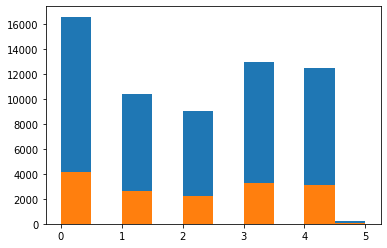

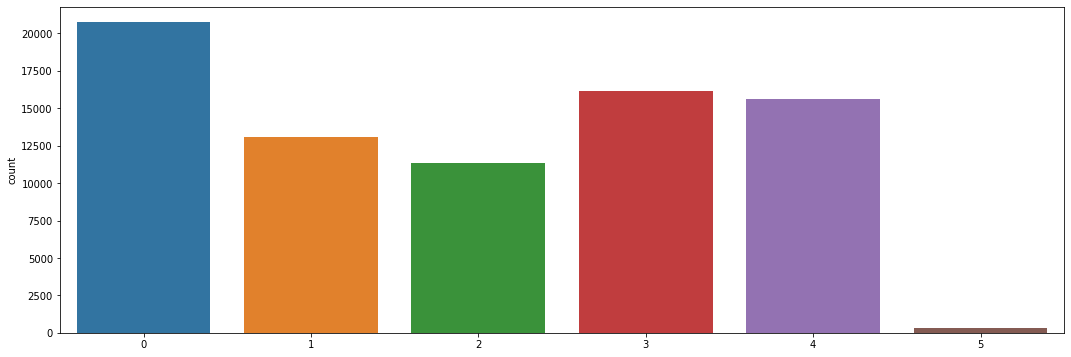

In [145]:
print(X_train.shape) 
print(X_test.shape)  
print(y_train.shape) 
print(y_test.shape)

plt.hist(y_train, bins=10)
plt.hist(y_test, bins=10)
plt.show()

fig, ax1 = plt.subplots()
fig.set_size_inches(18,6)
plt.sca(ax1)
sns.countplot(x = y, ax = ax1)

In [146]:
X_train_t = X_train.reshape(X_train.shape[0], 14, 1)
X_test_t = X_test.reshape(X_test.shape[0], 14, 1)

print("최종 DATA")
print(X_train_t.shape)

최종 DATA
(61777, 14, 1)


In [147]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(14, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


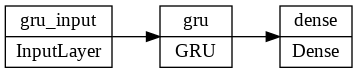

In [148]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [73]:
#ffill
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

hist_ffill = model_gru.fit(X_train_t, y_train, epochs=100, 
                     batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
1931/1931 [==============================] - 28s 15ms/step - loss: 1.4023 - mean_squared_error: 1.4023
Epoch 2/100
1931/1931 [==============================] - 28s 15ms/step - loss: 1.3376 - mean_squared_error: 1.3376
Epoch 3/100
1931/1931 [==============================] - 29s 15ms/step - loss: 1.2818 - mean_squared_error: 1.2818
Epoch 4/100
1931/1931 [==============================] - 29s 15ms/step - loss: 1.2452 - mean_squared_error: 1.2452
Epoch 5/100
1931/1931 [==============================] - 29s 15ms/step - loss: 1.2089 - mean_squared_error: 1.2089
Epoch 6/100
1931/1931 [==============================] - 29s 15ms/step - loss: 1.1729 - mean_squared_error: 1.1729
Epoch 7/100
1931/1931 [==============================] - 29s 15ms/step - loss: 1.1470 - mean_squared_error: 1.1470
Epoch 8/100
1931/1931 [==============================] - 29s 15ms/step - loss: 1.1211 - mean_squared_error: 1.1211
Epoch 9/100
1931/1931 [==============================] - 28s 15ms/step - loss: 1

In [77]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 3s 6ms/step - loss: 0.9231 - mean_squared_error: 0.9231
MSE =  [0.9230603575706482, 0.9230603575706482]


##2. interpolate

In [149]:
df_new = df_raw_data3.join(df_interpolate,how='left')

In [150]:
X, y = df_new.iloc[:, 1:].values, df_new.iloc[:, :1].values
y = y. flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify = y)

print('X_rain :', X_train)
print('X_test :', X_test)
print('y_train :', y_train)
print('y_test :', y_test)

X_rain : [[ 0.          0.         26.         ...  0.          6.95261652
  50.41578087]
 [ 0.          0.         26.         ...  0.         17.6
  36.        ]
 [ 0.          0.         26.         ...  0.         23.5
  63.        ]
 ...
 [ 0.          0.         26.         ...  0.          8.2
  72.        ]
 [ 0.          1.         26.         ...  0.          7.70769231
  45.84615385]
 [ 0.          1.         26.         ...  0.         24.1
  71.        ]]
X_test : [[ 0.   0.  26.  ...  0.  31.5 61. ]
 [ 0.   0.  26.  ...  0.   8.2 72. ]
 [ 0.   0.  26.  ...  0.  12.6 45. ]
 ...
 [ 1.   1.  26.  ...  0.  22.  62. ]
 [ 0.   1.  26.  ...  0.  24.7 75. ]
 [ 0.   0.  26.  ...  0.  25.5 30. ]]
y_train : [0 4 1 ... 0 0 4]
y_test : [3 0 0 ... 2 1 0]


In [151]:
X_train_t = X_train.reshape(X_train.shape[0], 14, 1)
X_test_t = X_test.reshape(X_test.shape[0], 14, 1)

print("최종 DATA")
print(X_train_t.shape)

최종 DATA
(61777, 14, 1)


In [152]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(14, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


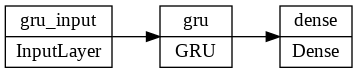

In [37]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [38]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

hist_interpolate = model_gru.fit(X_train_t, y_train, epochs=100, 
                     batch_size=32, verbose=1, callbacks=[early_stop])

1931/1931 [==============================] - 23s 12ms/step - loss: 0.6372 - mean_squared_error: 0.6372
Epoch 52/100
1931/1931 [==============================] - 23s 12ms/step - loss: 0.6347 - mean_squared_error: 0.6347
Epoch 53/100
1931/1931 [==============================] - 23s 12ms/step - loss: 0.6224 - mean_squared_error: 0.6224
Epoch 54/100
1931/1931 [==============================] - 23s 12ms/step - loss: 0.6249 - mean_squared_error: 0.6249
Epoch 00054: early stopping


In [39]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 2s 4ms/step - loss: 0.7906 - mean_squared_error: 0.7906
MSE =  [0.7906365990638733, 0.7906365990638733]


##3. Mean

In [154]:
df_new = df_raw_data3.join(df_mean,how='left')

In [156]:
X, y = df_new.iloc[:, 1:].values, df_new.iloc[:, :1].values
y = y. flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify = y)

print('X_rain :', X_train)
print('X_test :', X_test)
print('y_train :', y_train)
print('y_test :', y_test)

X_rain : [[0.00000000e+00 0.00000000e+00 2.60000000e+01 ... 5.23599939e-02
  1.99535915e+01 6.19494179e+01]
 [0.00000000e+00 0.00000000e+00 2.60000000e+01 ... 0.00000000e+00
  1.76000000e+01 3.60000000e+01]
 [0.00000000e+00 0.00000000e+00 2.60000000e+01 ... 0.00000000e+00
  2.35000000e+01 6.30000000e+01]
 ...
 [0.00000000e+00 0.00000000e+00 2.60000000e+01 ... 0.00000000e+00
  8.20000000e+00 7.20000000e+01]
 [0.00000000e+00 1.00000000e+00 2.60000000e+01 ... 5.23599939e-02
  1.99535915e+01 6.19494179e+01]
 [0.00000000e+00 1.00000000e+00 2.60000000e+01 ... 5.23599939e-02
  1.99535915e+01 6.19494179e+01]]
X_test : [[ 0.   0.  26.  ...  0.  31.5 61. ]
 [ 0.   0.  26.  ...  0.   8.2 72. ]
 [ 0.   0.  26.  ...  0.  12.6 45. ]
 ...
 [ 1.   1.  26.  ...  0.  22.  62. ]
 [ 0.   1.  26.  ...  0.  24.7 75. ]
 [ 0.   0.  26.  ...  0.  25.5 30. ]]
y_train : [0 4 1 ... 0 0 4]
y_test : [3 0 0 ... 2 1 0]


In [157]:
X_train_t = X_train.reshape(X_train.shape[0], 14, 1)
X_test_t = X_test.reshape(X_test.shape[0], 14, 1)

print("최종 DATA")
print(X_train_t.shape)

최종 DATA
(61777, 14, 1)


In [158]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(14, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


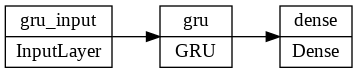

In [159]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [160]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

hist_mean = model_gru.fit(X_train_t, y_train, epochs=100, 
                     batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
1931/1931 [==============================] - 26s 12ms/step - loss: 2.0828 - mean_squared_error: 2.0828
Epoch 2/100
1931/1931 [==============================] - 23s 12ms/step - loss: 1.9097 - mean_squared_error: 1.9097
Epoch 3/100
1931/1931 [==============================] - 23s 12ms/step - loss: 1.7991 - mean_squared_error: 1.7991
Epoch 4/100
1931/1931 [==============================] - 23s 12ms/step - loss: 1.7163 - mean_squared_error: 1.7163
Epoch 5/100
1931/1931 [==============================] - 24s 12ms/step - loss: 1.6330 - mean_squared_error: 1.6330
Epoch 6/100
1931/1931 [==============================] - 23s 12ms/step - loss: 1.5467 - mean_squared_error: 1.5467
Epoch 7/100
1931/1931 [==============================] - 23s 12ms/step - loss: 1.5005 - mean_squared_error: 1.5005
Epoch 8/100
1931/1931 [==============================] - 23s 12ms/step - loss: 1.4610 - mean_squared_error: 1.4610
Epoch 9/100
1931/1931 [==============================] - 23s 12ms/step - loss: 1

In [161]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 2s 4ms/step - loss: 0.9397 - mean_squared_error: 0.9397
MSE =  [0.9396913051605225, 0.9396913051605225]


##4. Median

In [162]:
df_new = df_raw_data3.join(df_median,how='left')

In [163]:
X, y = df_new.iloc[:, 1:].values, df_new.iloc[:, :1].values
y = y. flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify = y)

print('X_rain :', X_train)
print('X_test :', X_test)
print('y_train :', y_train)
print('y_test :', y_test)

X_rain : [[ 0.   0.  26.  ...  0.  20.2 62. ]
 [ 0.   0.  26.  ...  0.  17.6 36. ]
 [ 0.   0.  26.  ...  0.  23.5 63. ]
 ...
 [ 0.   0.  26.  ...  0.   8.2 72. ]
 [ 0.   1.  26.  ...  0.  20.2 62. ]
 [ 0.   1.  26.  ...  0.  20.2 62. ]]
X_test : [[ 0.   0.  26.  ...  0.  31.5 61. ]
 [ 0.   0.  26.  ...  0.   8.2 72. ]
 [ 0.   0.  26.  ...  0.  12.6 45. ]
 ...
 [ 1.   1.  26.  ...  0.  22.  62. ]
 [ 0.   1.  26.  ...  0.  24.7 75. ]
 [ 0.   0.  26.  ...  0.  25.5 30. ]]
y_train : [0 4 1 ... 0 0 4]
y_test : [3 0 0 ... 2 1 0]


In [164]:
X_train_t = X_train.reshape(X_train.shape[0], 14, 1)
X_test_t = X_test.reshape(X_test.shape[0], 14, 1)

print("최종 DATA")
print(X_train_t.shape)

최종 DATA
(61777, 14, 1)


In [165]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(14, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


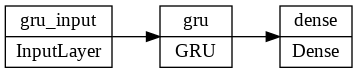

In [166]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [167]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

hist_median = model_gru.fit(X_train_t, y_train, epochs=100, 
                     batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
1931/1931 [==============================] - 25s 12ms/step - loss: 2.0604 - mean_squared_error: 2.0604
Epoch 2/100
1931/1931 [==============================] - 23s 12ms/step - loss: 1.8437 - mean_squared_error: 1.8437
Epoch 3/100
1931/1931 [==============================] - 23s 12ms/step - loss: 1.7601 - mean_squared_error: 1.7601
Epoch 4/100
1931/1931 [==============================] - 24s 12ms/step - loss: 1.6694 - mean_squared_error: 1.6694
Epoch 5/100
1931/1931 [==============================] - 23s 12ms/step - loss: 1.5896 - mean_squared_error: 1.5896
Epoch 6/100
1931/1931 [==============================] - 24s 12ms/step - loss: 1.5175 - mean_squared_error: 1.5175
Epoch 7/100
1931/1931 [==============================] - 24s 12ms/step - loss: 1.4522 - mean_squared_error: 1.4522
Epoch 8/100
1931/1931 [==============================] - 24s 12ms/step - loss: 1.3989 - mean_squared_error: 1.3989
Epoch 9/100
1931/1931 [==============================] - 24s 12ms/step - loss: 1

In [168]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 3s 4ms/step - loss: 0.9220 - mean_squared_error: 0.9220
MSE =  [0.9219536185264587, 0.9219536185264587]


##5. KNN

In [169]:
df_new = df_raw_data3.join(df_knn,how='left')

In [170]:
X, y = df_new.iloc[:, 1:].values, df_new.iloc[:, :1].values
y = y. flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify = y)

print('X_rain :', X_train)
print('X_test :', X_test)
print('y_train :', y_train)
print('y_test :', y_test)

X_rain : [[0.00000000e+00 0.00000000e+00 2.60000000e+01 ... 5.23599939e-02
  1.99535915e+01 6.19494179e+01]
 [0.00000000e+00 0.00000000e+00 2.60000000e+01 ... 0.00000000e+00
  1.76000000e+01 3.60000000e+01]
 [0.00000000e+00 0.00000000e+00 2.60000000e+01 ... 0.00000000e+00
  2.35000000e+01 6.30000000e+01]
 ...
 [0.00000000e+00 0.00000000e+00 2.60000000e+01 ... 0.00000000e+00
  8.20000000e+00 7.20000000e+01]
 [0.00000000e+00 1.00000000e+00 2.60000000e+01 ... 5.23599939e-02
  1.99535915e+01 6.19494179e+01]
 [0.00000000e+00 1.00000000e+00 2.60000000e+01 ... 5.23599939e-02
  1.99535915e+01 6.19494179e+01]]
X_test : [[ 0.   0.  26.  ...  0.  31.5 61. ]
 [ 0.   0.  26.  ...  0.   8.2 72. ]
 [ 0.   0.  26.  ...  0.  12.6 45. ]
 ...
 [ 1.   1.  26.  ...  0.  22.  62. ]
 [ 0.   1.  26.  ...  0.  24.7 75. ]
 [ 0.   0.  26.  ...  0.  25.5 30. ]]
y_train : [0 4 1 ... 0 0 4]
y_test : [3 0 0 ... 2 1 0]


In [171]:
X_train_t = X_train.reshape(X_train.shape[0], 14, 1)
X_test_t = X_test.reshape(X_test.shape[0], 14, 1)

print("최종 DATA")
print(X_train_t.shape)

최종 DATA
(61777, 14, 1)


In [172]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(14, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


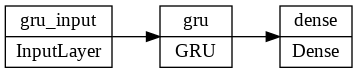

In [173]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

hist_knn = model_gru.fit(X_train_t, y_train, epochs=100, 
                     batch_size=32, verbose=1, callbacks=[early_stop])

In [ ]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

##6. MissForest

In [ ]:
df_new = df_raw_data3.join(df_missForest,how='left')

In [ ]:
X, y = df_new.iloc[:, 1:].values, df_new.iloc[:, :1].values
y = y. flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify = y)

print('X_rain :', X_train)
print('X_test :', X_test)
print('y_train :', y_train)
print('y_test :', y_test)

In [ ]:
X_train_t = X_train.reshape(X_train.shape[0], 14, 1)
X_test_t = X_test.reshape(X_test.shape[0], 14, 1)

print("최종 DATA")
print(X_train_t.shape)

In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(14, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

In [ ]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

hist_missForest = model_gru.fit(X_train_t, y_train, epochs=100, 
                     batch_size=32, verbose=1, callbacks=[early_stop])

In [ ]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

##7. MICE

In [ ]:
df_new = df_raw_data3.join(df_MICE,how='left')

In [ ]:
X, y = df_new.iloc[:, 1:].values, df_new.iloc[:, :1].values
y = y. flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify = y)

print('X_rain :', X_train)
print('X_test :', X_test)
print('y_train :', y_train)
print('y_test :', y_test)

In [ ]:
X_train_t = X_train.reshape(X_train.shape[0], 14, 1)
X_test_t = X_test.reshape(X_test.shape[0], 14, 1)

print("최종 DATA")
print(X_train_t.shape)

In [ ]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(14, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

In [ ]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

hist_MICE = model_gru.fit(X_train_t, y_train, epochs=100, 
                     batch_size=32, verbose=1, callbacks=[early_stop])

In [ ]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

##Result-Loss

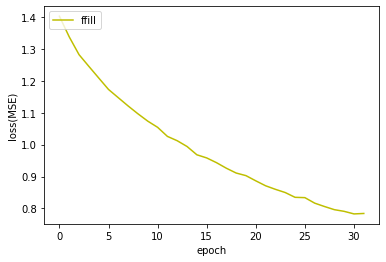

In [74]:
figs, loss_ax = plt.subplots()
loss_ax.plot(hist_ffill.history['loss'],'y',label='ffill')
loss_ax.plot(hist_interpolate.history['loss'],'y',label='interpolate')
loss_ax.plot(hist_mean.history['loss'],'y',label='mean')
loss_ax.plot(hist_median.history['loss'],'y',label='median')
loss_ax.plot(hist_knn.history['loss'],'y',label='knn')
loss_ax.plot(hist_missForest.history['loss'],'y',label='missForest')
loss_ax.plot(hist_MICE.history['loss'],'y',label='MICE')

loss_ax.legend(loc='upper left')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')

plt.show()

Adaboost-GRU 적용

In [ ]:
from keras.layers.recurrent_v2 import GRU
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor
K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(11, 1)))
model_gru.add(Dense(1)) # output = 1 
model_gru.compile(loss='mean_squared_error', optimizer='adam') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#kerasRegressor로 분류기 만든 뒤, AdaBoostRegressor로 최종 결합
GRU_Predictors = KerasRegressor(build_fn=lambda:model_gru, epochs=20, batch_size=30)
model_adaboostgru = AdaBoostRegressor(GRU_Predictors, n_estimators=5, random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  


In [ ]:
tf.keras.utils.plot_model(
    model=model_adaboostgru, to_file="adaboostgru_model.png", show_shapes=False, rankdir="LR")

AttributeError: ignored

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model_adaboostgru.fit(X_train_t, y_train)

Epoch 1/20
163/163 [==============================] - 8s 17ms/step - loss: 2.4938
Epoch 2/20
163/163 [==============================] - 2s 11ms/step - loss: 2.2141
Epoch 3/20
163/163 [==============================] - 2s 11ms/step - loss: 2.0998
Epoch 4/20
163/163 [==============================] - 2s 12ms/step - loss: 1.9472
Epoch 5/20
163/163 [==============================] - 2s 11ms/step - loss: 1.8790
Epoch 6/20
163/163 [==============================] - 2s 11ms/step - loss: 1.8372
Epoch 7/20
163/163 [==============================] - 2s 11ms/step - loss: 1.8269
Epoch 8/20
163/163 [==============================] - 2s 12ms/step - loss: 1.8008
Epoch 9/20
163/163 [==============================] - 2s 11ms/step - loss: 1.6986
Epoch 10/20
163/163 [==============================] - 2s 12ms/step - loss: 1.6416
Epoch 11/20
163/163 [==============================] - 2s 12ms/step - loss: 1.5445
Epoch 12/20
163/163 [==============================] - 2s 11ms/step - loss: 1.4268
Epoch 13/20
1

AdaBoostRegressor(base_estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fb175d03550>,
                  n_estimators=5, random_state=42)

In [ ]:
score = model_adaboostgru.score(X_test_t, y_test)
print(score)

0.5726726461957605


CNN+LSTM 적용

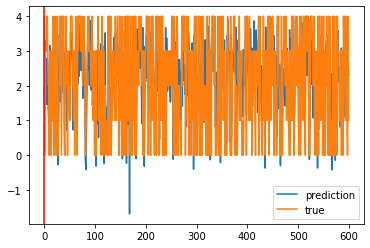

In [ ]:
preds = model.predict(X_test_t)

plt.plot(preds[:600], label='prediction')
plt.plot(y_test[:600], label='true')
plt.axvline(x=len(y_test)-len(preds), color='r')
plt.legend()
plt.show()

Define a DNN model

In [ ]:
import os

import tensorflow as tf
import datetime

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import feature_column as fc



In [ ]:
df_fc = df_raw_data
df_fc.head()

,station_name,holiday,day_week,weekend,temperature,humid,precipitation,precipitation_type,year,month,day,hour,minute,total_car_num
0,26,0,3,0,23.0,52.0,0.0,0.0,2020,9,17,21,20,2
1,26,0,3,0,23.0,52.0,0.0,0.0,2020,9,17,21,38,3
2,26,0,4,0,25.3,38.0,0.0,0.0,2020,9,18,16,45,4
3,26,0,4,0,25.3,38.0,0.0,0.0,2020,9,18,16,50,4
4,26,0,4,0,25.3,38.0,0.0,0.0,2020,9,18,16,55,4


In [ ]:
df_fc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6108 entries, 0 to 6116
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   station_name        6108 non-null   int64  
 1   holiday             6108 non-null   int64  
 2   day_week            6108 non-null   int64  
 3   weekend             6108 non-null   int64  
 4   temperature         6108 non-null   float64
 5   humid               6108 non-null   float64
 6   precipitation       6108 non-null   float64
 7   precipitation_type  6108 non-null   float64
 8   year                6108 non-null   int64  
 9   month               6108 non-null   int64  
 10  day                 6108 non-null   int64  
 11  hour                6108 non-null   int64  
 12  minute              6108 non-null   int64  
 13  total_car_num       6108 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 715.8 KB


In [ ]:
train, test = train_test_split(df_fc, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), '훈련 샘플')
print(len(val), '검증 샘플')
print(len(test), '테스트 샘플')

3908 훈련 샘플
978 검증 샘플
1222 테스트 샘플


In [ ]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('total_car_num')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size = len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [ ]:
batch_size = 10
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [ ]:
train_ds

<BatchDataset shapes: ({station_name: (None,), holiday: (None,), day_week: (None,), weekend: (None,), temperature: (None,), humid: (None,), precipitation: (None,), precipitation_type: (None,), year: (None,), month: (None,), day: (None,), hour: (None,), minute: (None,)}, (None,)), types: ({station_name: tf.int64, holiday: tf.int64, day_week: tf.int64, weekend: tf.int64, temperature: tf.float64, humid: tf.float64, precipitation: tf.float64, precipitation_type: tf.float64, year: tf.int64, month: tf.int64, day: tf.int64, hour: tf.int64, minute: tf.int64}, tf.int64)>

In [ ]:
for feature_batch, label_batch in train_ds.take(1):
  print("Total feature: ", list(feature_batch.keys()))
  print("Target feature: ", label_batch)

Total feature:  ['station_name', 'holiday', 'day_week', 'weekend', 'temperature', 'humid', 'precipitation', 'precipitation_type', 'year', 'month', 'day', 'hour', 'minute']
Target feature:  tf.Tensor([0 4 4 0 3 2 0 4 0 3], shape=(10,), dtype=int64)


In [ ]:
example_batch = next(iter(train_ds))[0]
feature_batch

{'day': <tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 9, 29,  6,  9,  6, 13,  1, 21,  9, 22])>,
 'day_week': <tf.Tensor: shape=(10,), dtype=int64, numpy=array([2, 1, 1, 2, 1, 6, 3, 0, 2, 1])>,
 'holiday': <tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])>,
 'hour': <tf.Tensor: shape=(10,), dtype=int64, numpy=array([15, 23, 21, 16, 13, 21,  9, 15, 14, 16])>,
 'humid': <tf.Tensor: shape=(10,), dtype=float64, numpy=array([66., 57., 36., 66., 64., 59., 78., 47., 76., 41.])>,
 'minute': <tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 9, 10, 40, 45, 10, 30,  0, 20, 14, 35])>,
 'month': <tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 9,  9, 10,  9, 10,  9, 10,  9,  9,  9])>,
 'precipitation': <tf.Tensor: shape=(10,), dtype=float64, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])>,
 'precipitation_type': <tf.Tensor: shape=(10,), dtype=float64, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])>,
 'station_name': <tf.Tensor: shape=(10,), dt

In [ ]:
# 특성 열을 만들고 배치 데이터를 변환하는 함수
def demo(feature_column):
  feature_layer = layers.DenseFeatures(feature_column)
  print(feature_layer(feature_batch).numpy())

In [ ]:
crossed_feature = fc.crossed_column(['day_week', 'hour'], hash_bucket_size=170)
demo(fc.indicator_column(crossed_feature))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
feature_columns = []

for colname in ["station_name", "holiday", "day_week", "weekend", "temperature", "humid", "precipitation", "precipitation_type", "year", "month", "day", "hour", "minute"]:
  feature_columns.append(fc.numeric_column(colname))

crossed_feature  = fc.crossed_column(['day_week', 'hour'], hash_bucket_size=170)
crossed_feature  = fc.indicator_column(crossed_feature)
feature_columns.append(crossed_feature)

In [ ]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [ ]:
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)